# Experiment 1 - May-Oct. 2017 V.S. May-Oct.2018

In [2]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from regpyhdfe import Regpyhdfe
from linearmodels.iv import absorbing
import matplotlib.axes as ax
from scipy import stats
from statsmodels.base.model import GenericLikelihoodModel
from statsmodels.base.model import LikelihoodModel
from sklearn import preprocessing

from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
import unicodedata
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
from linearmodels.iv import absorbing

from linearmodels.datasets import wage_panel
from linearmodels.panel import PanelOLS
from linearmodels.iv.model import (
    COVARIANCE_ESTIMATORS,
    ClusteredCovariance,
    HeteroskedasticCovariance,
    HomoskedasticCovariance,
    KernelCovariance,
)
warnings.simplefilter(action='ignore')

## Table 4

### Table 4 Change in Number of Requested Third-Party Domains and Cookies EU firm & requests

In [3]:
def table4_1(data):
    data['trend_EU-audience'] = data['trend']*data['eu_audience']
    data['trend_nonEU-audience'] = data['trend']*data['noneu_audience']
    data['post_EU-audience'] = data['after']*data['eu_audience']
    data['post_nonEU-audience'] = data['after']*data['noneu_audience']
    data['trend_post_EU-audience'] = data['trend_after']*data['after']*data['eu_audience']
    data['trend_post_nonEU-audience'] = data['trend_after']*data['after']*data['noneu_audience']
    D = data[data['eu_location'].isin([1])& data['exclude'].isin([0])]

    cats = pd.DataFrame({'h': pd.Categorical(D['h'])})
    exog_variables = ['trend_EU-audience','trend_nonEU-audience','trend_post_EU-audience',
              'trend_post_nonEU-audience','post_EU-audience','post_nonEU-audience']
    endog_variable = ['log_requests3']

    exog = sm.tools.tools.add_constant(D[exog_variables])
    endog = D[endog_variable]

    model = absorbing.AbsorbingLS(endog, exog, absorb= cats, drop_absorbed=False)
    model_res = model.fit(cov_type= 'clustered',clusters = D['h'],debiased=True)

    print('Mean dependent variable = ',np.mean(D['log_requests3']))
    print("Change in Number of Requested Third-Party Domains and Cookies- EU firm & requests")
    print(model_res.summary)


### Table 4 Change in Number of Requested Third-Party Domains and Cookies non-EU firm & requests

In [4]:
def table4_2(data):
    data['trend_EU-audience'] = data['trend']*data['eu_audience']
    data['trend_nonEU-audience'] = data['trend']*data['noneu_audience']
    data['post_EU-audience'] = data['after']*data['eu_audience']
    data['post_nonEU-audience'] = data['after']*data['noneu_audience']
    data['trend_post_EU-audience'] = data['trend_after']*data['after']*data['eu_audience']
    data['trend_post_nonEU-audience'] = data['trend_after']*data['after']*data['noneu_audience']
    D = data[data['eu_location'].isin([0])& data['exclude'].isin([0])]
    cats = pd.DataFrame({'h': pd.Categorical(D['h'])})
    exog_variables = ['trend_EU-audience','trend_nonEU-audience','trend_post_EU-audience',
              'trend_post_nonEU-audience','post_EU-audience','post_nonEU-audience']
    endog_variable = ['log_requests3']

    exog = sm.tools.tools.add_constant(D[exog_variables])
    endog = D[endog_variable]

    model = absorbing.AbsorbingLS(endog, exog, absorb= cats, drop_absorbed=False)
    model_res = model.fit(cov_type= 'clustered',clusters = D['h'], debiased=True)
    print('Mean dependent variable = ',np.mean(D['log_requests3']))
    print("Change in Number of Requested Third-Party Domains and Cookies non-EU firm & requests")
    print(model_res.summary)

### Table 4 Change in Number of Requested Third-Party Domains and Cookies EU firm & cookies

In [5]:
def table4_3(data):
    data['trend_EU-audience'] = data['trend']*data['eu_audience']
    data['trend_nonEU-audience'] = data['trend']*data['noneu_audience']
    data['post_EU-audience'] = data['after']*data['eu_audience']
    data['post_nonEU-audience'] = data['after']*data['noneu_audience']
    data['trend_post_EU-audience'] = data['trend_after']*data['after']*data['eu_audience']
    data['trend_post_nonEU-audience'] = data['trend_after']*data['after']*data['noneu_audience']
    D = data[data['eu_location'].isin([1])& data['exclude'].isin([0])]
    cats = pd.DataFrame({'h': pd.Categorical(D['h'])})

    exog_variables = ['trend_EU-audience','trend_nonEU-audience','trend_post_EU-audience',
              'trend_post_nonEU-audience','post_EU-audience','post_nonEU-audience']
    endog_variable = ['log_cookies3']

    exog = sm.tools.tools.add_constant(D[exog_variables])
    endog = D[endog_variable]

    model = absorbing.AbsorbingLS(endog, exog, absorb= cats, drop_absorbed=False)
    model_res = model.fit(cov_type= 'clustered',clusters = D['h'], debiased=True)
    print('Mean dependent variable = ',np.mean(D['log_cookies3']))
    print("Change in Number of Requested Third-Party Domains and Cookies EU firm & cookies")
    print(model_res.summary)

### Table 4 Change in Number of Requested Third-Party Domains and Cookies non-EU firm & cookies

In [6]:
def table4_4(data):
    data['trend_EU-audience'] = data['trend']*data['eu_audience']
    data['trend_nonEU-audience'] = data['trend']*data['noneu_audience']
    data['post_EU-audience'] = data['after']*data['eu_audience']
    data['post_nonEU-audience'] = data['after']*data['noneu_audience']
    data['trend_post_EU-audience'] = data['trend_after']*data['after']*data['eu_audience']
    data['trend_post_nonEU-audience'] = data['trend_after']*data['after']*data['noneu_audience']
    D = data[data['eu_location'].isin([0])& data['exclude'].isin([0])]
    cats = pd.DataFrame({'h': pd.Categorical(D['h'])})

    exog_variables = ['trend_EU-audience','trend_nonEU-audience','trend_post_EU-audience',
              'trend_post_nonEU-audience','post_EU-audience','post_nonEU-audience']
    endog_variable = ['log_cookies3']

    exog = sm.tools.tools.add_constant(D[exog_variables])
    endog = D[endog_variable]

    model = absorbing.AbsorbingLS(endog, exog, absorb= cats, drop_absorbed=False)
    model_res = model.fit(cov_type= 'clustered',clusters = D['h'], debiased=True)
    print('Mean dependent variable = ',np.mean(D['log_cookies3']))
    print("Change in Number of Requested Third-Party Domains and Cookies non-EU firm & cookies")
    print(model_res.summary)

In [7]:
data = pd.read_stata('..\mksc.2021.1339\data\gdpr_website.dta')

data = data[(data['date']<np.datetime64('2017-10-02')) & 
         (data['date']>np.datetime64('2017-05-14')) | 
         (data['date']<np.datetime64('2018-10-02')) & 
         (data['date']>np.datetime64('2018-05-14'))]    
table4_1(data)
table4_2(data)
table4_3(data)
table4_4(data)

Mean dependent variable =  2.3547089099884033
Change in Number of Requested Third-Party Domains and Cookies- EU firm & requests
                         Absorbing LS Estimation Summary                          
Dep. Variable:          log_requests3   R-squared:                          0.8852
Estimator:               Absorbing LS   Adj. R-squared:                     0.8781
No. Observations:              495363   F-statistic:                        188.49
Date:                Tue, Dec 06 2022   P-value (F-stat):                   0.0000
Time:                        03:37:54   Distribution:                  F(6,466218)
Cov. Estimator:             clustered   R-squared (No Effects):             0.0019
                                        Varaibles Absorbed:              2.914e+04
                                     Parameter Estimates                                     
                           Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------

## Table 5

### Table 5 Change in Number of Requested Third-Party Domains and Cookies: Website Popularity EU firm & requests

In [8]:
def table5_1(data):
    data['trend_EU-audience'] = data['trend']*data['eu_audience']
    data['trend_nonEU-audience'] = data['trend']*data['noneu_audience']
    data['post_EU-audience'] = data['after']*data['eu_audience']
    data['post_nonEU-audience'] = data['after']*data['noneu_audience']
    data['trend_post_EU-audience'] = data['trend_after']*data['after']*data['eu_audience']
    data['trend_post_nonEU-audience'] = data['trend_after']*data['after']*data['noneu_audience']
    data['post_EU-audience_top'] = data['after']*data['eu_audience']*data['top']
    data['post_nonEU-audience_top'] = data['after']*data['noneu_audience']*data['top']
    D = data[data['top'].isin([0,1]) & data['eu_location'].isin([1])& data['exclude'].isin([0])]
    cats = pd.DataFrame({'h': pd.Categorical(D['h'])})
    endog_variable = ['log_requests3']
    exog_variables = ['trend_EU-audience','trend_nonEU-audience','trend_post_EU-audience',
          'trend_post_nonEU-audience','post_EU-audience','post_nonEU-audience',
          'post_EU-audience_top','post_nonEU-audience_top']
    exog = sm.tools.tools.add_constant(D[exog_variables])
    endog = D[endog_variable]

    model = absorbing.AbsorbingLS(endog, exog, absorb= cats, drop_absorbed=False)
    model_res = model.fit(cov_type= 'clustered',clusters = D['h'], debiased=True)
    print('Mean dependent variable = ',np.mean(D['log_requests3']))
    print("Change in Number of Requested Third-Party Domains and Cookies: Website Popularity EU firm & requests")
    print(model_res.summary)

### Table 5 Change in Number of Requested Third-Party Domains and Cookies: Website Popularity non-EU firm & requests

In [9]:
def table5_2(data):
    data['trend_EU-audience'] = data['trend']*data['eu_audience']
    data['trend_nonEU-audience'] = data['trend']*data['noneu_audience']
    data['post_EU-audience'] = data['after']*data['eu_audience']
    data['post_nonEU-audience'] = data['after']*data['noneu_audience']
    data['trend_post_EU-audience'] = data['trend_after']*data['after']*data['eu_audience']
    data['trend_post_nonEU-audience'] = data['trend_after']*data['after']*data['noneu_audience']
    data['post_EU-audience_top'] = data['after']*data['eu_audience']*data['top']
    data['post_nonEU-audience_top'] = data['after']*data['noneu_audience']*data['top']
    D = data[data['top'].isin([0,1]) & data['eu_location'].isin([0])& data['exclude'].isin([0])]
    cats = pd.DataFrame({'h': pd.Categorical(D['h'])})
    endog_variable = ['log_requests3']
    exog_variables = ['trend_EU-audience','trend_nonEU-audience','trend_post_EU-audience',
              'trend_post_nonEU-audience','post_EU-audience','post_nonEU-audience',
              'post_EU-audience_top','post_nonEU-audience_top']

    exog = sm.tools.tools.add_constant(D[exog_variables])
    endog = D[endog_variable]

    model = absorbing.AbsorbingLS(endog, exog, absorb= cats, drop_absorbed=False)
    model_res = model.fit(cov_type= 'clustered',clusters = D['h'], debiased=True)
    print('Mean dependent variable = ',np.mean(D['log_requests3']))
    print("Change in Number of Requested Third-Party Domains and Cookies: Website Popularity non-EU firm & requests")
    print(model_res.summary)

### Table 5 Change in Number of Requested Third-Party Domains and Cookies: Website Popularity EU firm & cookies

In [10]:
def table5_3(data):
    data['trend_EU-audience'] = data['trend']*data['eu_audience']
    data['trend_nonEU-audience'] = data['trend']*data['noneu_audience']
    data['post_EU-audience'] = data['after']*data['eu_audience']
    data['post_nonEU-audience'] = data['after']*data['noneu_audience']
    data['trend_post_EU-audience'] = data['trend_after']*data['after']*data['eu_audience']
    data['trend_post_nonEU-audience'] = data['trend_after']*data['after']*data['noneu_audience']
    data['post_EU-audience_top'] = data['after']*data['eu_audience']*data['top']
    data['post_nonEU-audience_top'] = data['after']*data['noneu_audience']*data['top']
    D = data[data['top'].isin([0,1]) & data['eu_location'].isin([1])& data['exclude'].isin([0])]
    cats = pd.DataFrame({'h': pd.Categorical(D['h'])})
    endog_variable = ['log_cookies3']
    exog_variables = ['trend_EU-audience','trend_nonEU-audience','trend_post_EU-audience',
              'trend_post_nonEU-audience','post_EU-audience','post_nonEU-audience',
              'post_EU-audience_top','post_nonEU-audience_top']

    exog = sm.tools.tools.add_constant(D[exog_variables])
    endog = D[endog_variable]

    model = absorbing.AbsorbingLS(endog, exog, absorb= cats, drop_absorbed=False)
    model_res = model.fit(cov_type= 'clustered',clusters = D['h'], debiased=True)
    print('Mean dependent variable = ',np.mean(D['log_cookies3']))
    print("Change in Number of Requested Third-Party Domains and Cookies: Website Popularity EU firm & cookies")
    print(model_res.summary)

### Table 5 Change in Number of Requested Third-Party Domains and Cookies: Website Popularity non-EU firm & cookies

In [11]:
def table5_4(data):
    data['trend_EU-audience'] = data['trend']*data['eu_audience']
    data['trend_nonEU-audience'] = data['trend']*data['noneu_audience']
    data['post_EU-audience'] = data['after']*data['eu_audience']
    data['post_nonEU-audience'] = data['after']*data['noneu_audience']
    data['trend_post_EU-audience'] = data['trend_after']*data['after']*data['eu_audience']
    data['trend_post_nonEU-audience'] = data['trend_after']*data['after']*data['noneu_audience']
    data['post_EU-audience_top'] = data['after']*data['eu_audience']*data['top']
    data['post_nonEU-audience_top'] = data['after']*data['noneu_audience']*data['top']
    D = data[data['top'].isin([0,1]) & data['eu_location'].isin([0])& data['exclude'].isin([0])]
    cats = pd.DataFrame({'h': pd.Categorical(D['h'])})
    endog_variable = ['log_cookies3']
    exog_variables = ['trend_EU-audience','trend_nonEU-audience','trend_post_EU-audience',
              'trend_post_nonEU-audience','post_EU-audience','post_nonEU-audience',
              'post_EU-audience_top','post_nonEU-audience_top']

    exog = sm.tools.tools.add_constant(D[exog_variables])
    endog = D[endog_variable]

    model = absorbing.AbsorbingLS(endog, exog, absorb= cats, drop_absorbed=False)
    model_res = model.fit(cov_type= 'clustered',clusters = D['h'], debiased=True)
    print('Mean dependent variable = ',np.mean(D['log_cookies3']))
    print("Change in Number of Requested Third-Party Domains and Cookies: Website Popularity non-EU firm & cookies")
    print(model_res.summary)

In [12]:
data = pd.read_stata('..\mksc.2021.1339\data\gdpr_website.dta')

data = data[(data['date']<np.datetime64('2017-10-02')) & 
         (data['date']>np.datetime64('2017-05-14')) | 
         (data['date']<np.datetime64('2018-10-02')) & 
         (data['date']>np.datetime64('2018-05-14'))]    
table5_1(data)
table5_2(data)
table5_3(data)
table5_4(data)

Mean dependent variable =  2.354806661605835
Change in Number of Requested Third-Party Domains and Cookies: Website Popularity EU firm & requests
                         Absorbing LS Estimation Summary                          
Dep. Variable:          log_requests3   R-squared:                          0.8852
Estimator:               Absorbing LS   Adj. R-squared:                     0.8780
No. Observations:              495057   F-statistic:                        141.58
Date:                Tue, Dec 06 2022   P-value (F-stat):                   0.0000
Time:                        03:44:28   Distribution:                  F(8,465928)
Cov. Estimator:             clustered   R-squared (No Effects):             0.0019
                                        Varaibles Absorbed:              2.912e+04
                                     Parameter Estimates                                     
                           Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--

## Figure 2

In [28]:
def figure2_variable(data,square):
    data = data[data['exclude'] == 0]
    avg_log = []
    D = data[data['square'].isin([square]) & data['exclude'].isin([0])]
    for i in range(len(D['date'].unique())):
        D_temp = D[D['date'].isin([D['date'].unique()[i]])]
        avg_log.append(D_temp['logx_requests3'].mean())
        
    return D['date'].unique(), avg_log

def figure2_plot(data):
    GDPR = np.datetime64('2018-05-25')
    plt.figure(figsize=(20, 15), dpi=80)
    plt.subplot(221)
    x,y = figure2_variable(data,1)
    #plt.ylim(2.36,2.44)
    plt.plot_date(x,y)
    plt.plot(x,y)
    plt.title('EU')
    plt.ylabel('EU')
    plt.axvline(x = GDPR, color = 'b', linestyle = '--')

    plt.subplot(222)
    x,y = figure2_variable(data,2)
    #plt.ylim(2.26,2.3)
    plt.plot_date(x,y)
    plt.plot(x,y)
    plt.title('non-EU')
    plt.ylabel('EU')
    plt.axvline(x = GDPR, color = 'b', linestyle = '--')
    
    plt.subplot(223)
    x,y = figure2_variable(data,3)
    #plt.ylim(2.56,2.64)
    plt.plot_date(x,y)
    plt.plot(x,y)
    plt.title('EU')
    plt.ylabel('non-EU')
    plt.axvline(x = GDPR, color = 'b', linestyle = '--')
    
    plt.subplot(224)
    x,y = figure2_variable(data,4)
    #plt.ylim(2.38,2.48)
    plt.plot_date(x,y)
    plt.plot(x,y)
    plt.title('non-EU')
    plt.ylabel('non-EU')
    plt.axvline(x = GDPR, color = 'b', linestyle = '--')
    plt.suptitle('Figure 2. Number of Requested Third-Party Domains')
        

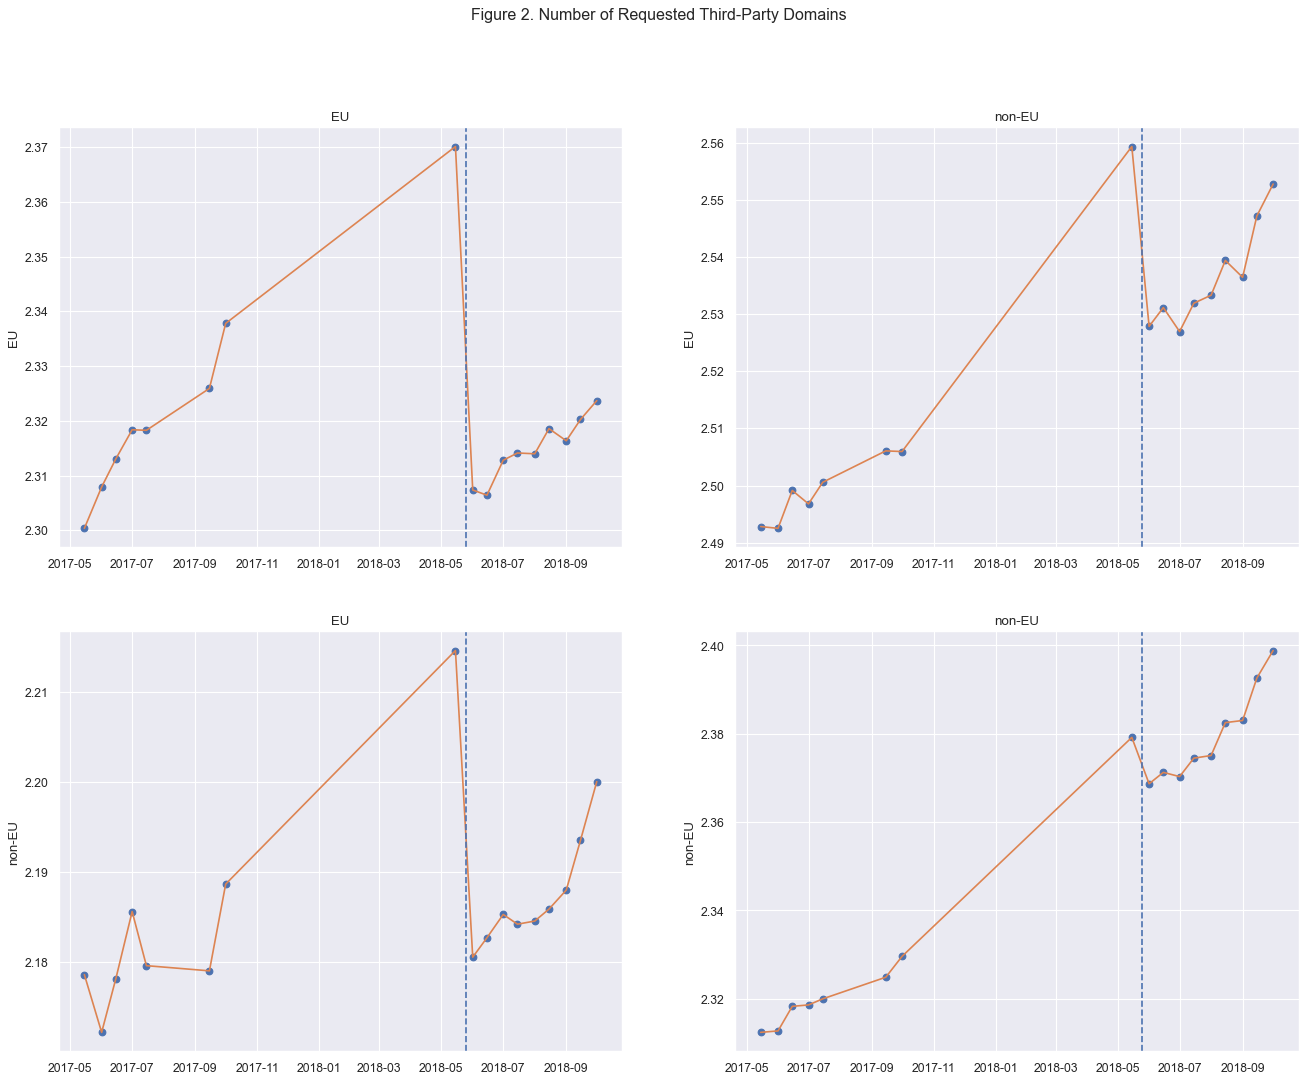

In [29]:
data = pd.read_stata('..\mksc.2021.1339\data\gdpr_website.dta')

data = data[(data['date']<np.datetime64('2017-10-02')) & 
         (data['date']>np.datetime64('2017-05-14')) | 
         (data['date']<np.datetime64('2018-10-02')) & 
         (data['date']>np.datetime64('2018-05-14'))]   
figure2_plot(data)

## Figure 4

In [31]:
def figure4_variable(data,square):
    data = data[data['square'].isin([square]) & data['exclude'].isin([0])]
    D = data.groupby(['date','square'],as_index=False).agg(date=('date','first'),square=('square','first'),
                        irequests3_fb = ('irequests3_fb','mean'),
                        log_requests3_nonfb = ('log_requests3_nonfb','mean'))
        
    return D['date'], D['irequests3_fb'], D['log_requests3_nonfb']

def figure4_plot(data):

    GDPR = np.datetime64('2018-05-25')
    facebook = np.datetime64('2018-03-17')

    plt.figure(figsize=(20, 15), dpi=80)
    plt.subplot(221)
    x,y1,y2 = figure4_variable(data,1)
    y2 = y2-1.8332
    #plt.ylim(2.36,2.44)
    plt.plot_date(x,y1,label = 'fb')
    plt.plot_date(x,y2, label = 'non-fb')
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.title('EU')
    plt.ylabel('EU')
    plt.axvline(x = GDPR, color = 'b', linestyle = '--')
    plt.axvline(x = facebook, color = 'b', linestyle = '--')
    plt.legend()

    plt.subplot(222)
    x,y1,y2 = figure4_variable(data,2)
    y2 = y2-1.99
    #plt.ylim(2.26,2.3)
    plt.plot_date(x,y1)
    plt.plot_date(x,y2)
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.title('non-EU')
    plt.ylabel('EU')
    plt.axvline(x = GDPR, color = 'b', linestyle = '--')
    plt.axvline(x = facebook, color = 'b', linestyle = '--')

    plt.subplot(223)
    x,y1,y2 = figure4_variable(data,3)
    y2 = y2-1.753
    plt.plot_date(x,y1)
    plt.plot_date(x,y2)
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.title('EU')
    plt.ylabel('non-EU')
    plt.axvline(x = GDPR, color = 'b', linestyle = '--')
    plt.axvline(x = facebook, color = 'b', linestyle = '--')

    plt.subplot(224)
    x,y1,y2 = figure4_variable(data,4)
    y2 = y2-1.85
    #plt.ylim(2.38,2.48)
    plt.plot_date(x,y1)
    plt.plot_date(x,y2)
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.title('non-EU')
    plt.ylabel('non-EU')
    plt.axvline(x = GDPR, color = 'b', linestyle = '--')
    plt.axvline(x = facebook, color = 'b', linestyle = '--')
    plt.suptitle("Requested Third-Party Domains, Facebook vs. non-Facebook")


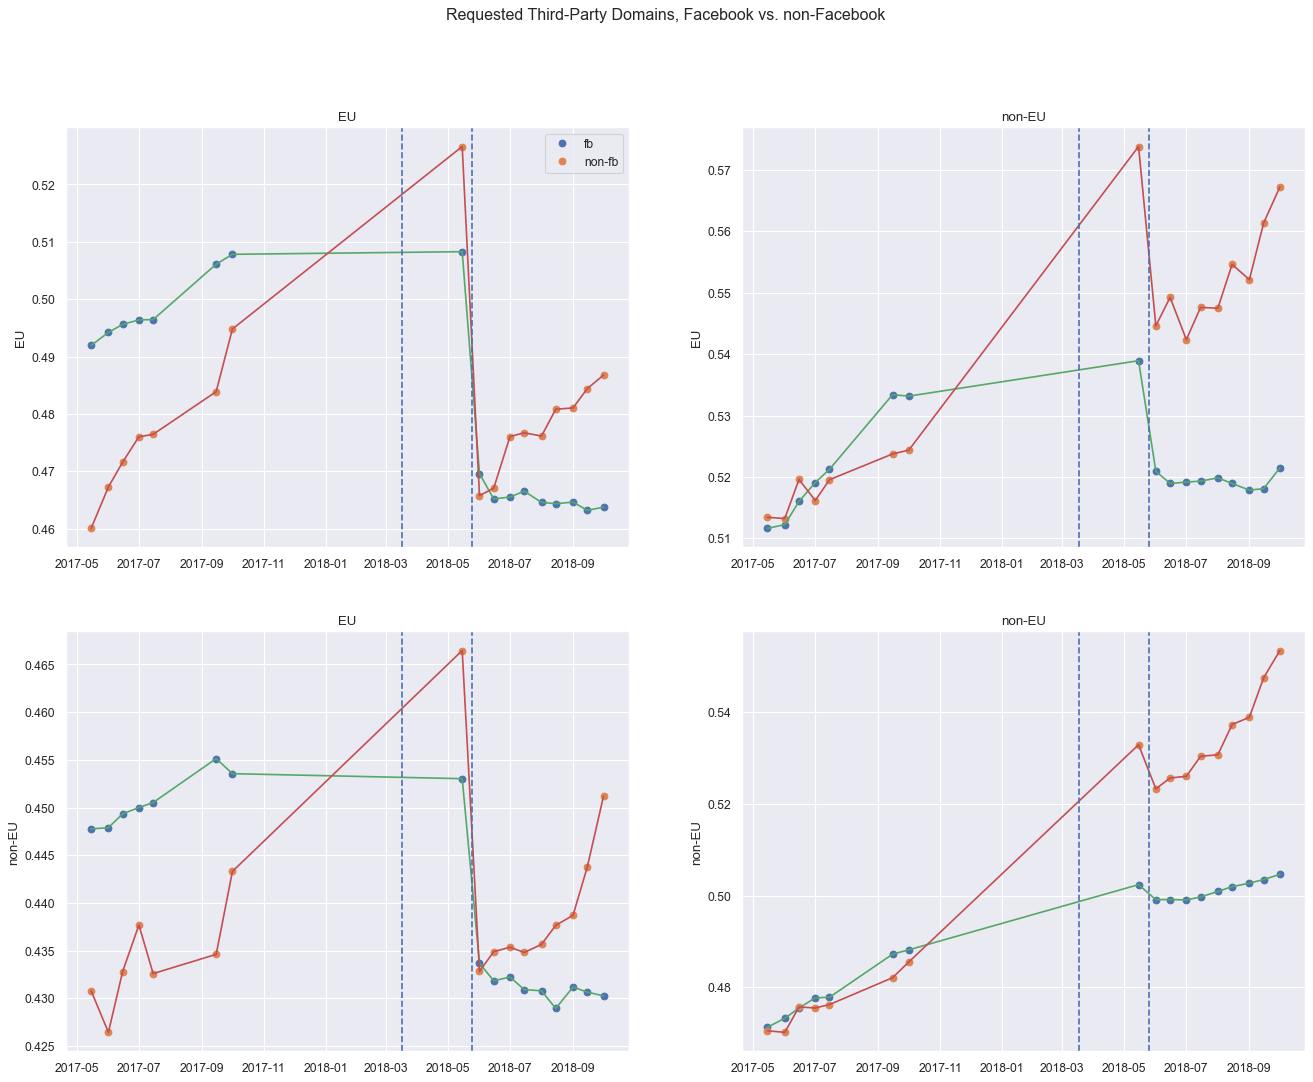

In [32]:
data = pd.read_stata('..\mksc.2021.1339\data\gdpr_website.dta')

data = data[(data['date']<np.datetime64('2017-10-02')) & 
         (data['date']>np.datetime64('2017-05-14')) | 
         (data['date']<np.datetime64('2018-10-02')) & 
         (data['date']>np.datetime64('2018-05-14'))]   
figure4_plot(data)

## Table 6

In [33]:
def table6(data,data_policy):
    data = data[data['exclude']==0]
    D = data.merge(data_policy, on='tracker', how='left') #after drop if _merge ==2
    DD = data.merge(data_policy, how='inner', on='tracker') #find _merge = 3
    _merge3 = DD['tracker'].unique().tolist()
    m = []
    for i in range(len(D)):
        if D['tracker'][i] in _merge3:
             m.append(1)
        else:
             m.append(0)
    D['m'] = m
    #bys tracker_firm: egen temp=max(m) keep if temp==1
    D_agg = D.groupby(['tracker_firm'],as_index=False).agg({'m': ['max']}) #bys tracker_firm: egen temp=max(m)
    D_sorted = D[D['tracker_firm'].isin(D_agg[D_agg['m']['max']==1]['tracker_firm'].tolist())] #keep if temp = 1
    D_sorted1 = D_sorted.groupby(['tracker_firm','date'],as_index=False).agg(date=('date','first'),shr_undisclosed = ('shr_undisclosed','max'),
                        shr_aggregate = ('shr_aggregate','max'),shr_anonymous = ('shr_anonymous','max'),shr_pseudo = ('shr_pseudo','max'),
                        shr_pii = ('shr_pii','max'),shr_sensitive = ('shr_sensitive','max'),
                        col_undisclosed = ('col_undisclosed','max'), col_anonymous = ('col_anonymous','max'),col_pseudo = ('col_pseudo','max'), col_pii = ('col_pii','max'),
                        col_sensitive = ('col_sensitive','max'),
                        use_undisclosed = ('use_undisclosed','max'),
                        use_analytics = ('use_analytics','max'),
                        use_ad = ('use_ad','max'),
                        use_custom = ('use_custom','max'),
                        use_optimization = ('use_optimization','max'),
                        use_tracking = ('use_tracking','max'),
                                                                         
                        retention = ('retention','max'),
                        websites=('websites','sum'),
                        websites_cookie=('websites','sum'),
                        totalwebsites=('totalwebsites','mean'))
    D_sorted1['ms_websites_firm'] = D_sorted1['websites']/D_sorted1['totalwebsites']*100 #gen ms_websites_firm=(websites/totalwebsites)*100
    D_sorted1['ms_websites_cookie_firm'] = D_sorted1['websites_cookie']/D_sorted1['totalwebsites']*100 #gen ms_websites_cookie_firm=(websites_cookie/totalwebsites)*100

    D_sorted1['post']=np.where(D_sorted1['date']>np.datetime64('2018-05-25'), 1,0 )
    D_sorted1['trend']=(D_sorted1['date']- D_sorted1['date'].min()+np.timedelta64(1, 'D'))/np.timedelta64(100, 'D')
    D_sorted1['col_personal_post']=D_sorted1['post']*D_sorted1['col_pii']
    D_sorted1['shr_personal_post']=D_sorted1['post']*D_sorted1['shr_pii']
    D_sorted1['shr_col_personal_post']=D_sorted1['post']*D_sorted1['shr_pii']*D_sorted1['col_pii']
    D_sorted1['col_personal_trend']=D_sorted1['trend']*D_sorted1['col_pii']
    D_sorted1['shr_personal_trend']=D_sorted1['trend']*D_sorted1['shr_pii']
    D_sorted1['shr_col_personal_trend']=D_sorted1['trend']*D_sorted1['shr_pii']*D_sorted1['col_pii']
    D_sorted1['tf']=D_sorted1.groupby('tracker_firm').ngroup()
    D_sorted1['log_websites']=np.log(1+D_sorted1['websites'])
    D_sorted1['log_websites_cookie']=np.log(1+D_sorted1['websites_cookie'])

    cats = pd.DataFrame({'tf': pd.Categorical(D_sorted1['tf'])})
    endog = D_sorted1['log_websites']
    exog = sm.tools.tools.add_constant(D_sorted1[['post','col_personal_post','trend','col_personal_trend']])
    model = absorbing.AbsorbingLS(endog, exog, absorb= cats, drop_absorbed=False)
    model_res = model.fit(cov_type= 'clustered',clusters = D_sorted1['tf'], debiased=True)
    print(model_res.summary)
    
    exog = sm.tools.tools.add_constant(D_sorted1[['post','col_personal_post','shr_personal_post','trend','col_personal_trend','shr_personal_trend']])
    model = absorbing.AbsorbingLS(endog, exog, absorb= cats, drop_absorbed=False)
    model_res = model.fit(cov_type= 'clustered',clusters = D_sorted1['tf'], debiased=True)
    print(model_res.summary)
    
    exog = sm.tools.tools.add_constant(D_sorted1[['post','col_personal_post','shr_personal_post','shr_col_personal_post',
                                                  'trend','col_personal_trend','shr_personal_trend',
                                                  'shr_col_personal_trend']])
    model = absorbing.AbsorbingLS(endog, exog, absorb= cats, drop_absorbed=False)
    model_res = model.fit(cov_type= 'clustered',clusters = D_sorted1['tf'], debiased=True)
    print(model_res.summary)

In [ ]:
data_policy

In [34]:
data_policy = pd.read_stata('..\mksc.2021.1339\data\policies_before.dta') #each tracker only has one entry
data = pd.read_stata('..\mksc.2021.1339\data\gdpr_vendors.dta')
data = data[(data['date']<np.datetime64('2017-10-02')) & 
         (data['date']>np.datetime64('2017-05-14')) | 
         (data['date']<np.datetime64('2018-10-02')) & 
         (data['date']>np.datetime64('2018-05-14'))]  
table6(data,data_policy)

                         Absorbing LS Estimation Summary                          
Dep. Variable:           log_websites   R-squared:                          0.9493
Estimator:               Absorbing LS   Adj. R-squared:                     0.9461
No. Observations:               36397   F-statistic:                        12.011
Date:                Sat, Dec 03 2022   P-value (F-stat):                   0.0000
Time:                        23:47:25   Distribution:                   F(4,34252)
Cov. Estimator:             clustered   R-squared (No Effects):             0.0123
                                        Varaibles Absorbed:                 2140.0
                                 Parameter Estimates                                  
                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------
const                  2.7719     0.0141     196.97     0.0000      2.7443 

## Figure 5

In [1]:
def figure5(dgpr_vendors,n,drawing_style):
    # ------------------------------------------------
    # This function will take dgpr_vendors dataset and output an image to show the Top n Winners in the market share due to
    # the DGPR and the Top n Loasers in the market share due to the DGPR.
    # Inputs: 
    #    dgpr_vendors dataset: dataset
    #    n:  (int) indicated how many firms you would like to see in chart from top to bottom that win/losethe most
    #    drawing_style: ([(linestyle,marker)]) list of n tuples that can used to indicate firm when drawing
    # Output: Figure 5 Graph
    # ---------------------------------------------------
    # bys tracker_firm date: keep if _n==1
    dgpr_vendors1 =dgpr_vendors.sort_values(by=['tracker_firm','date'])
    dgpr_vendors2 = dgpr_vendors1.groupby(['tracker_firm','date'],as_index=False).agg(date=('date','first'),
                                                                                  tracker_firm=('tracker_firm','first'),
                                                                                    ms_websites_firm=('ms_websites_firm','first'))
    
    # gen after=date>=td(25may2018)
    dgpr_vendors2['after']=np.where(dgpr_vendors2['date']>np.datetime64('2018-05-25'), 1,0 )
    
    # bys tracker_firm after: egen avg_ms=mean(ms_websites_firm) and keep if _n==1
    dgpr_vendors2 = dgpr_vendors2.sort_values(by=['tracker_firm','after'])
    dgpr_vendors3 = dgpr_vendors2.groupby(['tracker_firm','after'],as_index=False).agg(
                                                                                        tracker_firm=('tracker_firm','first'),
                                                                                        avg_ms=('ms_websites_firm','mean'),
                                                                                        after = ('after','first'))
    # bys tracker_firm: gen dms =avg_ms-avg_ms[_n-1]
    dgpr_vendors3['dms'] = [0] + [dgpr_vendors3.avg_ms[i]- dgpr_vendors3.avg_ms[i-1] for i in range(1,(len(dgpr_vendors3)))]
    dgpr_vendors3.loc[dgpr_vendors3['after']==0,'dms']=0
    
    # keep if after ==1
    dgpr_vendors4 = dgpr_vendors3[dgpr_vendors3['after']==1]
    
    # gen minus=dms<0
    dgpr_vendors4['minus'] = np.where(dgpr_vendors4['dms']<0, 1,0 )
    
    # gen absd=abs(dms)
    dgpr_vendors4['absd'] = abs(dgpr_vendors4['dms'])
    
    
    # egen rank_plus=rank(absd) if minus==0
    dgpr_vendors4['rank_plus']=0
    dgpr_vendors4.loc[dgpr_vendors4['minus']==0,'rank_plus']=dgpr_vendors4[dgpr_vendors4['minus']==0]['absd'].rank(method='max')
    
    
    # egen rank_minus=rank(absd) if minus ==1
    dgpr_vendors4['rank_minus']=0
    dgpr_vendors4.loc[dgpr_vendors4['minus']==1,'rank_minus']=dgpr_vendors4[dgpr_vendors4['minus']==1]['absd'].rank(method='max')
    
    # replace rank_plus=r(max) - rank_plus+1
    dgpr_vendors4['rank_plus'] = dgpr_vendors4['rank_plus'].max()-dgpr_vendors4['rank_plus']+1
    
    
    #replace rank_minus=r(max) -rank_minus+1
    dgpr_vendors4['rank_minus']=dgpr_vendors4['rank_minus'].max()-dgpr_vendors4['rank_minus']+1
    
    # merge 1:m tracker_firm using "gdpr_vendors.dta"
    processed_dgpr_vendors1=dgpr_vendors1.merge(dgpr_vendors4[['tracker_firm','rank_plus','rank_minus']],on='tracker_firm',how='left')
    
    # Keep date tracker_firm ms_websites_firm rank_plus rank_minus
    processed_dgpr_vendors1_clean = processed_dgpr_vendors1[['date','tracker_firm','ms_websites_firm','rank_plus','rank_minus']]
    
    # bys tracker_firm date: keep if _n=1
    processed_dgpr_vendors1_clean = processed_dgpr_vendors1_clean.sort_values(by=['tracker_firm','date'])
    processed_dgpr_vendors1_clean1=processed_dgpr_vendors1_clean.groupby(['tracker_firm','date'],as_index=False).agg(
        date=('date','first'),tracker_firm=('tracker_firm','first'),ms_websites_firm=('ms_websites_firm','first'),
        rank_plus=('rank_plus','first'),rank_minus=('rank_minus','first'))
    
    # gen byte basedate = 1 if date ==td(15may2018)
    processed_dgpr_vendors1_clean1['basedate']=np.where(processed_dgpr_vendors1_clean1['date']==np.datetime64('2018-05-15'), 1,0 )
    
    # bysort tracker_firm (basedate) : gen ms_firm_change = (ms_websites_firm - ms_websites_firm[1])
    processed_dgpr_vendors1_clean1 = processed_dgpr_vendors1_clean1.sort_values(
        by=['tracker_firm','basedate'],ascending=[True, False])
    basedata=processed_dgpr_vendors1_clean1[processed_dgpr_vendors1_clean1['basedate']==1][['tracker_firm','ms_websites_firm']]
    processed_dgpr_vendors1_clean2=processed_dgpr_vendors1_clean1.merge(
        basedata,on='tracker_firm',how='left').rename(
        columns={'ms_websites_firm_x':'ms_websites_firm','ms_websites_firm_y': 'ms_websites_base'})
    processed_dgpr_vendors1_clean2['ms_firm_change']=[processed_dgpr_vendors1_clean2.ms_websites_firm[i]- 
                                                      processed_dgpr_vendors1_clean2.ms_websites_base[i] 
                                                      for i in range(0,(len(processed_dgpr_vendors1_clean2)))]
    
    # Plot Winners Chart
    winner_df = processed_dgpr_vendors1_clean2[processed_dgpr_vendors1_clean2['rank_plus']<(n+1)].sort_values(by=['rank_plus']).reset_index()
    winner_firm_order = winner_df['tracker_firm'].unique()
    winner_df = winner_df[['date','tracker_firm','ms_firm_change']]
    winner_plot_df=winner_df.pivot(index='date', columns='tracker_firm', values='ms_firm_change')
    for firm,(line,mark) in zip(winner_firm_order,drawing_style):
        plt.plot(winner_plot_df[firm],label=firm,linestyle=line,marker=mark)
    plt.axhline(y = 0)
    plt.axvline(x = np.datetime64('2018-05-15'),linestyle="--")
    plt.tick_params(axis='x', labelsize=8)
    plt.yticks(np.arange(-1, 1.2,0.5))
    plt.ylim([-1.2, 1.2])
    plt.xticks(np.arange(np.datetime64('2017-04'), np.datetime64('2018-12'),np.timedelta64(6, 'M')))
    plt.xlim([np.datetime64('2017-04-01'),np.datetime64('2018-12-01')])
    plt.title(f"Top {n} Winners")
    plt.legend(loc='best')
    plt.show()
    
    # Plot Loser Chart
    loser_df = processed_dgpr_vendors1_clean2[processed_dgpr_vendors1_clean2['rank_minus']<(n+1)].sort_values(
        by=['rank_minus']).reset_index()
    loser_firm_order = loser_df['tracker_firm'].unique()
    loser_df = loser_df[['date','tracker_firm','ms_firm_change']]
    loser_plot_df=loser_df.pivot(index='date', columns='tracker_firm', values='ms_firm_change')
    for firm,(line,mark) in zip(loser_firm_order,drawing_style):
        plt.plot(loser_plot_df[firm],label=firm,linestyle=line,marker=mark)
    plt.axhline(y = 0)
    plt.axvline(x = np.datetime64('2018-05-15'),linestyle="--")
    plt.tick_params(axis='x', labelsize=8)
    plt.yticks(np.arange(-0.2, 0.7,0.2))
    plt.ylim([-0.3, 0.7])
    plt.xticks(np.arange(np.datetime64('2017-04'), np.datetime64('2018-12'),np.timedelta64(6, 'M')))
    plt.xlim([np.datetime64('2017-04-01'),np.datetime64('2018-12-01')])
    plt.title(f"Top {n} Losers")
    plt.legend(loc='best')
    plt.show()

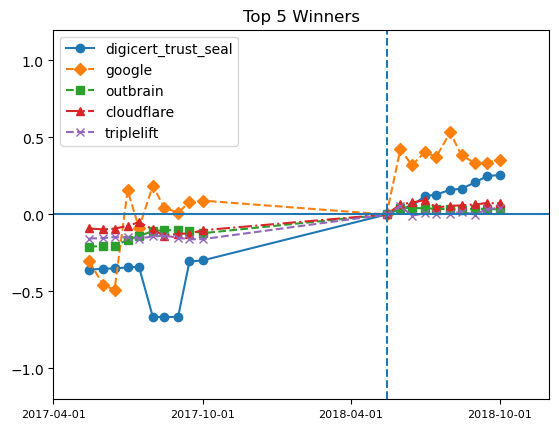

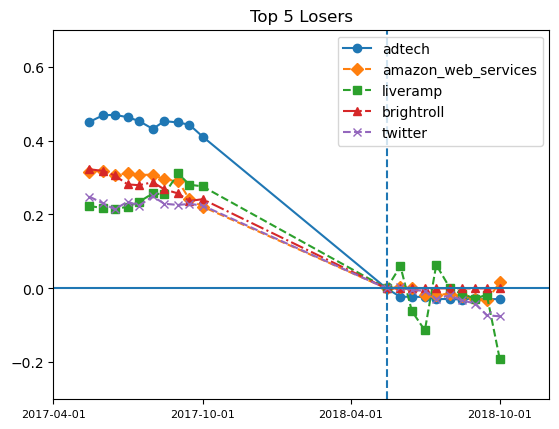

In [20]:
# Execute Example:
# Settings
dgpr_vendors=pd.read_stata("..\mksc.2021.1339\data\gdpr_vendors.dta")
dgpr_vendors = dgpr_vendors[(dgpr_vendors['date']<np.datetime64('2017-10-02')) & 
                                 (dgpr_vendors['date']>np.datetime64('2017-05-14')) | 
                                 (dgpr_vendors['date']<np.datetime64('2018-10-02')) & 
                                 (dgpr_vendors['date']>np.datetime64('2018-05-14'))]
n=5
drawing_style=[("-","o"),("--","D"),("--","s"),("-.","^"),("--","x")]
figure5(dgpr_vendors,n,drawing_style)

## Table 7

In [22]:
def table7(dgpr_vendors):
    # ------------------------------------------------
    # This function will take dgpr_vendors dataset and output the table (7) to show the change in Market Structure 
    # of the Web Technology Industry
    # Inputs: 
    #    dgpr_vendors dataset: dataset
    # Output: Table 7
    # ---------------------------------------------------
    
    
    # bys tracker_firm date: keep if _n==1
    result_table={}
    result_table["row_name"]=["After","(std err)","Observations","Pre-GDPR mean"]
    
    
    ## ---------------------- HHI All--------------------------------
    # collapse (sum) ms_websites_firm=ms_websites, by (tracker_firm date) fast
    dgpr_vendors1 = dgpr_vendors.groupby(['tracker_firm','date'],as_index=False).agg(date=('date','first'),
                                                                tracker_firm=('tracker_firm','first'),
                                                                ms_websites_firm=('ms_websites','sum'))
    # gen ms_websites_firm2=ms_websites_firm^2
    dgpr_vendors1['ms_websites_firm2'] = dgpr_vendors1['ms_websites_firm']**2
    
    # collapse (sum) hhi=ms_websites_firm2, by (date) fast
    dgpr_vendors2 = dgpr_vendors1.groupby(['date'],as_index=False).agg(date=('date','first'),
                                                                    hhi=('ms_websites_firm2','sum'))

    # gen after=date>td(25may2018)
    dgpr_vendors2['after']=np.where(dgpr_vendors2['date']>np.datetime64('2018-05-25'), 1,0 )
    
    # su date
    # gen trend=(date-r(min)+1)/100
    dgpr_vendors2['trend']=(dgpr_vendors2['date']- dgpr_vendors2['date'].min()+np.timedelta64(1, 'D'))/np.timedelta64(100, 'D')
    
    # su date if after==1
    # gen trend_after=(date-r(min)+1)/100
    dgpr_vendors2['trend_after']=0
    dgpr_vendors2.loc[dgpr_vendors2['after']==1,'trend_after']=(dgpr_vendors2.loc[
        dgpr_vendors2['after']==1,'date']-dgpr_vendors2.loc[dgpr_vendors2['after']==1,'date'].min()+
                                                                np.timedelta64(1, 'D'))/np.timedelta64(100, 'D')
    
    # eststo m_requests_g: reg hhi trend after c.trend_after#c.after, robust
    m_requests_g_all = smf.ols("hhi ~ trend + after + trend_after*after", data=dgpr_vendors2).fit(cov_type='HC1')
    m_requests_g_all.summary().tables[1]
    result_for_all = pd.read_html(m_requests_g_all.summary().tables[1].as_html(), header=0, index_col=0)[0]
    result_table["HHI all"]=[result_for_all.loc["after","coef"].round(3),result_for_all.loc["after","std err"].round(3),
                             f"{len(dgpr_vendors2)}",round(dgpr_vendors2[dgpr_vendors2['after']==0]["hhi"].mean(),3) ]
    
    
    ## ---------------------- HHI without Google--------------------------------
    
    # drop if tracker_firm=="google"
    dgpr_vendors_nonGoogle=dgpr_vendors[dgpr_vendors["tracker_firm"]!="google"]
    # collapse (sum) ms_websites_firm=ms_websites, by (tracker_firm date) fast
    dgpr_vendors3 = dgpr_vendors_nonGoogle.groupby(['tracker_firm','date'],as_index=False).agg(date=('date','first'),
                                                                tracker_firm=('tracker_firm','first'),
                                                                ms_websites_firm=('ms_websites','sum'))
    # gen ms_websites_firm2=ms_websites_firm^2
    dgpr_vendors3['ms_websites_firm2'] = dgpr_vendors3['ms_websites_firm']**2
    
    # collapse (sum) hhi=ms_websites_firm2, by (date) fast
    dgpr_vendors4 = dgpr_vendors3.groupby(['date'],as_index=False).agg(date=('date','first'),
                                                                    hhi=('ms_websites_firm2','sum'))

    # gen after=date>td(25may2018)
    dgpr_vendors4['after']=np.where(dgpr_vendors4['date']>np.datetime64('2018-05-25'), 1,0 )
    
    # su date
    # gen trend=(date-r(min)+1)/100
    dgpr_vendors4['trend']=(dgpr_vendors4['date']- dgpr_vendors4['date'].min()+np.timedelta64(1, 'D'))/np.timedelta64(100, 'D')
    
    # su date if after==1
    # gen trend_after=(date-r(min)+1)/100
    dgpr_vendors4['trend_after']=0
    dgpr_vendors4.loc[dgpr_vendors4['after']==1,'trend_after']=(dgpr_vendors4.loc[
        dgpr_vendors4['after']==1,'date']-dgpr_vendors4.loc[dgpr_vendors4['after']==1,'date'].min()+
                                                                np.timedelta64(1, 'D'))/np.timedelta64(100, 'D')
    
    # eststo m_requests_g: reg hhi trend after c.trend_after#c.after, robust
    m_requests_g_nonGoogle = smf.ols("hhi ~ trend + after + trend_after*after", data=dgpr_vendors4).fit(cov_type='HC1')
    m_requests_g_nonGoogle.summary().tables[1]
    result_for_nonGoogle = pd.read_html(m_requests_g_nonGoogle.summary().tables[1].as_html(), header=0, index_col=0)[0]
    result_table["HHI without Google"]=[result_for_nonGoogle.loc["after","coef"].round(3),
                                        result_for_nonGoogle.loc["after","std err"].round(3),
                             f"{len(dgpr_vendors4)}",round(dgpr_vendors4[dgpr_vendors4['after']==0]["hhi"].mean(),3) ]
    
    result=pd.DataFrame(result_table).set_index("row_name")
    result.index.name = None
    return result

In [23]:
dgpr_vendors=pd.read_stata("..\mksc.2021.1339\data\gdpr_vendors.dta")
dgpr_vendors = dgpr_vendors[(dgpr_vendors['date']<np.datetime64('2017-10-02')) & 
                                 (dgpr_vendors['date']>np.datetime64('2017-05-14')) | 
                                 (dgpr_vendors['date']<np.datetime64('2018-10-02')) & 
                                 (dgpr_vendors['date']>np.datetime64('2018-05-14'))]
table7(dgpr_vendors)

,HHI all,HHI without Google
After,10.063,-2.231
(std err),14.244,2.239
Observations,20,20
Pre-GDPR mean,951.322,71.486


## Table 8

In [25]:
def table8(dgpr_vendors):
    # ------------------------------------------------
    # This function will take dgpr_vendors dataset and output the table (8) to show the change in Market Structure and Number of Websites
    # Inputs: 
    #    dgpr_vendors dataset: dataset
    # Output: Table 8
    # ---------------------------------------------------
    result_table={}
    result_table["row_name"]=["Post X Google","(std err)","Post X Non-Google","(std err)",
                              "Observations","R2","Pre-GDPR Google","Pre-GDPR non-Google"]
    # gen after=date>=td(25may2018)
    dgpr_vendors['after']=np.where(dgpr_vendors['date']>np.datetime64('2018-05-25'), 1,0 )
    # gen log_websites=log(1+tracker_firm_websites)
    dgpr_vendors['log_websites']=np.log(1+dgpr_vendors['tracker_firm_websites'])
    # gen google=tracker_firm=="google"
    dgpr_vendors['google']=[1 if i else 0 for i in (dgpr_vendors['tracker_firm']=='google')]
    # gen nongoogle=1-google
    dgpr_vendors['nongoogle']=1-dgpr_vendors['google']
    
    # bys tracker_firm date: keep if _n==1	
    dgpr_vendors1=dgpr_vendors.groupby(['tracker_firm','date'],as_index=False).agg(date=('date','first'),
                                                                    tracker_firm=('tracker_firm','first'),
                                                                    ms_websites_firm=('ms_websites_firm','first'),
                                                                    Google=('google','first'),
                                                                    NonGoogle=('nongoogle','first'),
                                                                    log_websites=('log_websites','first'),
                                                                    Post=('after','first')) 
    
    # gen trend=(date-`r(min)'+1)/100
    dgpr_vendors1['trend']=(dgpr_vendors1['date']- dgpr_vendors1['date'].min()+np.timedelta64(1, 'D'))/np.timedelta64(100, 'D')
    
    # su date if after==1
    # gen trend_after=(date-`r(min)'+1)/100
    dgpr_vendors1['trend_after']=0
    dgpr_vendors1.loc[dgpr_vendors1['Post']==1,'trend_after']=(dgpr_vendors1.loc[
        dgpr_vendors1['Post']==1,'date']-dgpr_vendors1.loc[dgpr_vendors1['Post']==1,'date'].min()+
                                                                np.timedelta64(1, 'D'))/np.timedelta64(100, 'D')
    
    # egen tf=group(tracker_firm)
    dgpr_vendors1['tf']=dgpr_vendors1.groupby('tracker_firm').ngroup()
    
    
    dgpr_vendors1['trend_google']=dgpr_vendors1['trend']*dgpr_vendors1['Google']
    dgpr_vendors1['after_google']=dgpr_vendors1['Post']*dgpr_vendors1['Google']
    dgpr_vendors1['trend_after_after_google']=dgpr_vendors1['trend_after']*dgpr_vendors1['Post']*dgpr_vendors1['Google']
    dgpr_vendors1['trend_nongoogle']=dgpr_vendors1['trend']*dgpr_vendors1['NonGoogle']
    dgpr_vendors1['after_nongoogle']=dgpr_vendors1['Post']*dgpr_vendors1['NonGoogle']
    dgpr_vendors1['trend_after_after_nongoogle']=dgpr_vendors1['trend_after']*dgpr_vendors1['Post']*dgpr_vendors1['NonGoogle']

    
    # websites
    exog_variables_websites = ['trend_google','after_google','trend_after_after_google','trend_nongoogle',
                                                     'after_nongoogle','trend_after_after_nongoogle']
    endog_variable_websites = ['log_websites']
    cats_websites = pd.DataFrame({'tf': pd.Categorical(dgpr_vendors1['tf'])})
    exog_websites = sm.tools.tools.add_constant(dgpr_vendors1[exog_variables_websites])
    endog_websites =dgpr_vendors1[endog_variable_websites]
    model_websites = absorbing.AbsorbingLS(endog_websites, exog_websites, absorb= cats_websites, drop_absorbed=False)
    model_res_websites = model_websites.fit(cov_type= 'clustered',clusters =dgpr_vendors1['tf'],debiased=True)
    
    websites_summary_estimate= pd.read_html(model_res_websites.summary.tables[0].as_html(), header=0, index_col=0)[0]
    websites_summary_table = pd.read_html(model_res_websites.summary.tables[1].as_html(), header=0, index_col=0)[0]
    website_p_value_afterGoogle = float(websites_summary_table.loc['after_google','P-value'])
    website_p_value_afternonGoogle = float(websites_summary_table.loc['after_nongoogle','P-value'])
    result_table["No.websites"]=[f"{websites_summary_table.loc['after_google','Parameter'].round(4)}{'***' if (website_p_value_afterGoogle <0.01) else ( '**' if website_p_value_afterGoogle <0.05 else ('*' if website_p_value_afterGoogle  <0.1 else ''))}",
                    websites_summary_table.loc["after_google","Std. Err."].round(4),
                    f"{websites_summary_table.loc['after_nongoogle','Parameter'].round(4)}{'***' if (website_p_value_afternonGoogle <0.01) else ( '**' if website_p_value_afternonGoogle<0.05 else ('*' if website_p_value_afternonGoogle  <0.1 else ''))}",
                    websites_summary_table.loc["after_nongoogle","Std. Err."].round(4),
                    dgpr_vendors1.shape[0],
                    websites_summary_estimate.iloc[0,2],
                    round(np.mean(dgpr_vendors1['log_websites'][(dgpr_vendors1['Post'] == 0) & (dgpr_vendors1['Google']==1)]),4),
                    round(np.mean(dgpr_vendors1['log_websites'][(dgpr_vendors1['Post'] == 0) & (dgpr_vendors1['NonGoogle']==0)]),4)]
    
    # Market Shares
    exog_variables_ms = ['trend_google','after_google','trend_after_after_google','trend_nongoogle',
                                                     'after_nongoogle','trend_after_after_nongoogle']
    endog_variable_ms = ['ms_websites_firm']
    cats_ms = pd.DataFrame({'tf': pd.Categorical(dgpr_vendors1['tf'])})
    exog_ms = sm.tools.tools.add_constant(dgpr_vendors1[exog_variables_ms])
    endog_ms =dgpr_vendors1[endog_variable_ms]
    model_ms = absorbing.AbsorbingLS(endog_ms, exog_ms, absorb= cats_ms, drop_absorbed=False)
    model_res_ms = model_ms.fit(cov_type= 'clustered',clusters =dgpr_vendors1['tf'],debiased=True)

    ms_summary_estimate= pd.read_html(model_res_ms.summary.tables[0].as_html(), header=0, index_col=0)[0]
    ms_summary_table = pd.read_html(model_res_ms.summary.tables[1].as_html(), header=0, index_col=0)[0]
    ms_p_value_afterGoogle = float(ms_summary_table.loc['after_google','P-value'])
    ms_p_value_afternonGoogle = float(ms_summary_table.loc['after_nongoogle','P-value'])
    result_table["Market Shares"]=[f"{ms_summary_table.loc['after_google','Parameter'].round(4)}{ '***' if (ms_p_value_afterGoogle <0.01) else ( '**' if ms_p_value_afterGoogle<0.05 else ('*' if ms_p_value_afterGoogle <0.1 else ''))}",
                ms_summary_table.loc["after_google","Std. Err."].round(4),
                f"{ms_summary_table.loc['after_nongoogle','Parameter'].round(4)}{ '***' if (ms_p_value_afternonGoogle <0.01) else ( '**' if ms_p_value_afternonGoogle<0.05 else ('*' if ms_p_value_afternonGoogle <0.1 else ''))}",
                ms_summary_table.loc["after_nongoogle","Std. Err."].round(4),
                dgpr_vendors1.shape[0],
                ms_summary_estimate.iloc[0,2],
                round(np.mean(dgpr_vendors1['ms_websites_firm'][(dgpr_vendors1['Post'] == 0) & (dgpr_vendors1['Google']==1)]),4),
                round(np.mean(dgpr_vendors1['ms_websites_firm'][(dgpr_vendors1['Post'] == 0) & (dgpr_vendors1['NonGoogle']==1)]),4)]
    
    result=pd.DataFrame(result_table).set_index("row_name")
    result.index.name = None
    return result

In [26]:
dgpr_vendors=pd.read_stata("..\mksc.2021.1339\data\gdpr_vendors.dta")
dgpr_vendors = dgpr_vendors[(dgpr_vendors['date']<np.datetime64('2017-10-02')) & 
                                 (dgpr_vendors['date']>np.datetime64('2017-05-14')) | 
                                 (dgpr_vendors['date']<np.datetime64('2018-10-02')) & 
                                 (dgpr_vendors['date']>np.datetime64('2018-05-14'))]
table8(dgpr_vendors)

,No.websites,Market Shares
Post X Google,-0.0119***,0.2028***
(std err),0.0,0.0
Post X Non-Google,-0.0004,-0.0
(std err),0.0012,0.0
Observations,1265840,1265840
R2,0.8758,0.9993
Pre-GDPR Google,13.1191,29.6612
Pre-GDPR non-Google,13.1191,0.0011


## Table 9

In [27]:
def table9(dgpr_vendors_cat):
    # ------------------------------------------------
    # This function will take dgpr_vendors dataset and output the table (9) to show the change in Number of Websites based on different Submarket
    # Inputs: 
    #    dgpr_vendors dataset: dataset
    # Output: Table 9
    # ---------------------------------------------------
    categories=[("audio_video_player","Video"),("advertising","Advertising"),("site_analytics","Analytics"),
                ("cdn","CDN/API"),("unknown","Other")]
    dgpr_vendors_cat['trend_google']=dgpr_vendors_cat['trend']*dgpr_vendors_cat['google']
    dgpr_vendors_cat['trend_nongoogle']=dgpr_vendors_cat['trend']*dgpr_vendors_cat['nongoogle']
    dgpr_vendors_cat['trend_after_after_google']=dgpr_vendors_cat['trend_after']*dgpr_vendors_cat['after']*dgpr_vendors_cat['google']
    dgpr_vendors_cat['trend_after_after_nongoogle']=dgpr_vendors_cat['trend_after']*dgpr_vendors_cat['after']*dgpr_vendors_cat['nongoogle']
    dgpr_vendors_cat['after_google']=dgpr_vendors_cat['after']*dgpr_vendors_cat['google']
    dgpr_vendors_cat['after_nongoogle']=dgpr_vendors_cat['after']*dgpr_vendors_cat['nongoogle']
    result_table={}
    result_table["row_name"]=["Post X Google","(std err)","Post X Non-Google","(std err)",
                          "Observations","R2","Pre-GDPR Google","Pre-GDPR non-Google"]
    for (a,b) in categories:
        dgpr_vendors_cat_detail = dgpr_vendors_cat[dgpr_vendors_cat['category_id']==a]
        exog_variables = ['google','nongoogle','trend_google','trend_nongoogle',
                                                 'trend_after_after_google','trend_after_after_nongoogle',
                                                  'after_google','after_nongoogle']
        endog_variable = ['log_websites']
        cats= pd.DataFrame({'tf': pd.Categorical(dgpr_vendors_cat_detail['tf'])})
        exog = sm.tools.tools.add_constant(dgpr_vendors_cat_detail[exog_variables])
        endog =dgpr_vendors_cat_detail[endog_variable]
        model = absorbing.AbsorbingLS(endog, exog, absorb= cats, drop_absorbed=True)
        model_res = model.fit(cov_type= 'clustered',clusters =dgpr_vendors_cat_detail['tf'],debiased=True)
        
        summary_estimate= pd.read_html(model_res.summary.tables[0].as_html(), header=0, index_col=0)[0]
        summary_table = pd.read_html(model_res.summary.tables[1].as_html(), header=0, index_col=0)[0]
        p_value_afterGoogle = float(summary_table.loc['after_google','P-value'])
        p_value_afternonGoogle = float(summary_table.loc['after_nongoogle','P-value'])
        
        result_table[b]=[f"{summary_table.loc['after_google','Parameter'].round(6)}{ '***' if (p_value_afterGoogle <0.01) else ( '**' if p_value_afterGoogle<0.05 else ('*' if p_value_afterGoogle <0.1 else ''))}",
            summary_table.loc["after_google","Std. Err."].round(6),
            f"{summary_table.loc['after_nongoogle','Parameter'].round(6)}{ '***' if (p_value_afternonGoogle <0.01) else ( '**' if p_value_afternonGoogle<0.05 else ('*' if p_value_afternonGoogle <0.1 else ''))}",
            summary_table.loc["after_nongoogle","Std. Err."].round(6),
            dgpr_vendors_cat_detail.shape[0],
            round(float(summary_estimate.iloc[0,2]),6),
            round(np.mean(dgpr_vendors_cat_detail['log_websites'][(dgpr_vendors_cat_detail['after'] == 0) & (dgpr_vendors_cat_detail['google']==1)]),6),
            round(np.mean(dgpr_vendors_cat_detail['log_websites'][(dgpr_vendors_cat_detail['after'] == 0) & (dgpr_vendors_cat_detail['nongoogle']==1)]),6)]

    result=pd.DataFrame(result_table).set_index("row_name")
    result.index.name = None
    return result
    

In [29]:
dgpr_vendors_cat=pd.read_stata("..\mksc.2021.1339\data\gdpr_vendors_cat.dta")
dgpr_vendors_cat = dgpr_vendors_cat[(dgpr_vendors_cat['date']<np.datetime64('2017-10-02')) & 
                                 (dgpr_vendors_cat['date']>np.datetime64('2017-05-14')) | 
                                 (dgpr_vendors_cat['date']<np.datetime64('2018-10-02')) & 
                                 (dgpr_vendors_cat['date']>np.datetime64('2018-05-14'))]
table9(dgpr_vendors_cat)

,Video,Advertising,Analytics,CDN/API,Other
Post X Google,-0.0036***,-0.0214***,-0.0145***,-0.0074***,-0.022***
(std err),0.0,0.0,0.0,0.0,0.0
Post X Non-Google,-0.0014,-0.0441***,-0.0172***,-0.0017,-0.0032
(std err),0.0027,0.0111,0.0046,0.0011,0.0043
Observations,17714,17714,17714,17714,17714
R2,0.9843,0.9723,0.9808,0.9974,0.9798
Pre-GDPR Google,10.177214,12.235809,11.47565,11.718884,6.683246
Pre-GDPR non-Google,0.102427,2.242642,0.910283,0.184549,0.399961


## Table 10

In [30]:
def table10(dgpr_vendors_cat):
    # ------------------------------------------------
    # This function will take dgpr_vendors dataset and output the table (10) to show the change in Market Shares based on different Submarket
    # Inputs: 
    #    dgpr_vendors dataset: dataset
    # Output: Table 10
    # ---------------------------------------------------
    
    categories=[("audio_video_player","Video"),("advertising","Advertising"),("site_analytics","Analytics"),
                ("cdn","CDN/API"),("unknown","Other")]
    dgpr_vendors_cat['trend_google']=dgpr_vendors_cat['trend']*dgpr_vendors_cat['google']
    dgpr_vendors_cat['trend_nongoogle']=dgpr_vendors_cat['trend']*dgpr_vendors_cat['nongoogle']
    dgpr_vendors_cat['trend_after_after_google']=dgpr_vendors_cat['trend_after']*dgpr_vendors_cat['after']*dgpr_vendors_cat['google']
    dgpr_vendors_cat['trend_after_after_nongoogle']=dgpr_vendors_cat['trend_after']*dgpr_vendors_cat['after']*dgpr_vendors_cat['nongoogle']
    dgpr_vendors_cat['after_google']=dgpr_vendors_cat['after']*dgpr_vendors_cat['google']
    dgpr_vendors_cat['after_nongoogle']=dgpr_vendors_cat['after']*dgpr_vendors_cat['nongoogle']
    result_table={}
    result_table["row_name"]=["Post X Google","(std err)","Post X Non-Google","(std err)",
                          "Observations","R2","Pre-GDPR Google","Pre-GDPR non-Google"]
    for (a,b) in categories:
        dgpr_vendors_cat_detail = dgpr_vendors_cat[dgpr_vendors_cat['category_id']==a]
        exog_variables = ['google','nongoogle','trend_google','trend_nongoogle',
                                                 'trend_after_after_google','trend_after_after_nongoogle',
                                                  'after_google','after_nongoogle']
        endog_variable = ['ms_websites_firm']
        cats= pd.DataFrame({'tf': pd.Categorical(dgpr_vendors_cat_detail['tf'])})
        exog = sm.tools.tools.add_constant(dgpr_vendors_cat_detail[exog_variables])
        endog =dgpr_vendors_cat_detail[endog_variable]
        model = absorbing.AbsorbingLS(endog, exog, absorb= cats, drop_absorbed=True)
        model_res = model.fit(cov_type= 'clustered',clusters =dgpr_vendors_cat_detail['tf'],debiased=True)
        
        summary_estimate= pd.read_html(model_res.summary.tables[0].as_html(), header=0, index_col=0)[0]
        summary_table = pd.read_html(model_res.summary.tables[1].as_html(), header=0, index_col=0)[0]
        p_value_afterGoogle = float(summary_table.loc['after_google','P-value'])
        p_value_afternonGoogle = float(summary_table.loc['after_nongoogle','P-value'])
        
        result_table[b]=[f"{summary_table.loc['after_google','Parameter'].round(6)}{ '***' if (p_value_afterGoogle <0.01) else ( '**' if p_value_afterGoogle<0.05 else ('*' if p_value_afterGoogle <0.1 else ''))}",
            summary_table.loc["after_google","Std. Err."].round(6),
            f"{summary_table.loc['after_nongoogle','Parameter'].round(6)}{ '***' if (p_value_afternonGoogle <0.01) else ( '**' if p_value_afternonGoogle<0.05 else ('*' if p_value_afternonGoogle <0.1 else ''))}",
            summary_table.loc["after_nongoogle","Std. Err."].round(6),
            dgpr_vendors_cat_detail.shape[0],
            round(float(summary_estimate.iloc[0,2]),6),
            round(np.mean(dgpr_vendors_cat_detail['ms_websites_firm'][(dgpr_vendors_cat_detail['after'] == 0) & (dgpr_vendors_cat_detail['google']==1)]),6),
            round(np.mean(dgpr_vendors_cat_detail['ms_websites_firm'][(dgpr_vendors_cat_detail['after'] == 0) & (dgpr_vendors_cat_detail['nongoogle']==1)]),6)]

    result=pd.DataFrame(result_table).set_index("row_name")
    result.index.name = None
    return result
    

In [31]:
dgpr_vendors_cat=pd.read_stata("..\mksc.2021.1339\data\gdpr_vendors_cat.dta")
dgpr_vendors_cat = dgpr_vendors_cat[(dgpr_vendors_cat['date']<np.datetime64('2017-10-02')) & 
                                 (dgpr_vendors_cat['date']>np.datetime64('2017-05-14')) | 
                                 (dgpr_vendors_cat['date']<np.datetime64('2018-10-02')) & 
                                 (dgpr_vendors_cat['date']>np.datetime64('2018-05-14'))]
table10(dgpr_vendors_cat)

,Video,Advertising,Analytics,CDN/API,Other
Post X Google,-0.1586***,0.3274***,0.9137***,-0.3753***,-8.5e-05***
(std err),0.0,0.0,0.0,0.0,0.0
Post X Non-Google,0.0002,-0.0003,-0.0009,0.0004,0.0
(std err),0.0008,0.0007,0.0007,0.0007,0.0018
Observations,17714,17714,17714,17714,17714
R2,0.9997,0.9985,0.9976,0.9998,0.9791
Pre-GDPR Google,74.374786,26.848364,39.871235,71.293312,1.209089
Pre-GDPR non-Google,0.024616,0.070271,0.057761,0.027576,0.0949
